# Using KNN Algorithm to predict if a person will have diabetes or not

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data[0:6]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


#### Replace columns like [Gluscose,BloodPressure,SkinThickness,BMI,Insulin] with Zero as values with mean of respective column

In [5]:
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)


### extracting independent variables

In [6]:
X = data.iloc[:,0:8]

### extracting dependent variable

In [7]:
y = data.iloc[:,8]

### Explorning data to know relation before processing

<AxesSubplot:>

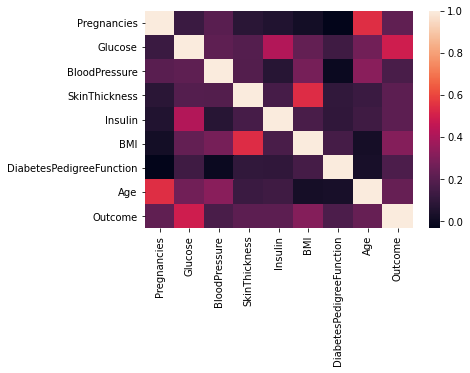

In [8]:
sns.heatmap(data.corr())

### splitting dataset into training and testing set

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [10]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150.0,78.0,29.0,126.0,35.2,0.692,54
118,4,97.0,60.0,23.0,155.0,28.2,0.443,22
247,0,165.0,90.0,33.0,680.0,52.3,0.427,23
157,1,109.0,56.0,21.0,135.0,25.2,0.833,23
468,8,120.0,72.0,29.0,155.0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
192,7,159.0,66.0,29.0,155.0,30.4,0.383,36
629,4,94.0,65.0,22.0,155.0,24.7,0.148,21
559,11,85.0,74.0,29.0,155.0,30.1,0.300,35


In [11]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199.0,76.0,43.0,155.0,42.9,1.394,22
122,2,107.0,74.0,30.0,100.0,33.6,0.404,23
113,4,76.0,62.0,29.0,155.0,34.0,0.391,25
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51
529,0,111.0,65.0,29.0,155.0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105.0,80.0,45.0,191.0,33.7,0.711,29
482,4,85.0,58.0,22.0,49.0,27.8,0.306,28
230,4,142.0,86.0,29.0,155.0,44.0,0.645,22
527,3,116.0,74.0,15.0,105.0,26.3,0.107,24


In [12]:
import math
def Euclidian_Distance(test,train):
    distance=0
    for x in range(len(test)):
        distance += pow((test[x] - train[x]), 2)
    return math.sqrt(distance)

In [13]:
def KNNClassifier(K):
    labels=[]
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    for i in range(num_test):
        distance=[] 
        index=[]
        for j in range(num_train):
            distance.append(Euclidian_Distance(X_test.iloc[i],X_train.iloc[j]))
            index.append(j)
        #dis_list = zip(distances, y_train)
        #sorted_list = sorted(dis_list)
        df1=pd.DataFrame({'Dis':distance,'ind':index})
        df1=df1.sort_values('Dis')
        zero_count = 0
        one_count = 0
        for i in df1['ind'].head(K):
            if y_train.iloc[i] == 1:
                one_count += 1
            else:
                zero_count += 1
        if one_count >= zero_count:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [14]:
labels=KNNClassifier(3)

In [16]:
y_test = np.array(y_test)
labels=np.array(labels)
labels.shape[0]

154

In [18]:
y_test = list(y_test)
tcount = 0
for i in range(len(labels)):
    if labels[i] == y_test[i]:
        tcount += 1
print((tcount / len(y_test))*100,"%")

72.72727272727273 %
